In [1]:
#import library yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock = yf.Ticker('TSLA') #Put inside the parenthesis the ticker you want to analyze
stockinfo = stock.info
#To have a cleaner view of the information you are extracting uncomment the next lines
# for line in stockinfo.items():
#     print(':', line)

Lets see how much the stock value have grow over time

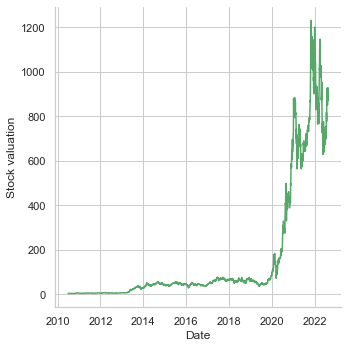

In [23]:
stock_grow = pd.DataFrame(stock.history(period='max').Close) 
stock_grow = stock_grow.rename(columns={'Close':'Stock valuation'})

#Plotting
sns.set_theme(style='whitegrid')
sns.set_context = 'poster'
sns.relplot(x='Date', y='Stock valuation', data = stock_grow, kind='line', color = 'g')
plt.show()

Looks like the stock valuation increased considerably in the last two years, let´s see the stock recommendations for that period of time

In [4]:
df = stock.recommendations
df['Date'] = df.index
df1 = df[['Date', 'To Grade']]

reco2020 = df1.loc[df1['Date'] >= '2020-01-01']
reco2021 = df1.loc[df1['Date'] >= '2021-01-01']
reco2022 = df1.loc[df1['Date'] >= '2022-01-01']
reco2020["Year"]="2020"
reco2021["Year"]="2021"
reco2022["Year"]="2022"
reco20s = pd.concat([reco2020, reco2021,reco2022])

reco20s = reco20s.rename(columns = {'To Grade':'Recommendation'})
recofiltered = reco20s[reco20s['Recommendation'].isin(['Sell', 'Underperform', 'Hold', 'Outperform', 'Buy'])]
recommendations = recofiltered.groupby('Year')['Recommendation'].value_counts()
recommendations

C:\Users\edflores\AppData\Local\Temp\ipykernel_9100\3381754781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco2020["Year"]="2020"
C:\Users\edflores\AppData\Local\Temp\ipykernel_9100\3381754781.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco2021["Year"]="2021"
C:\Users\edflores\AppData\Local\Temp\ipykernel_9100\3381754781.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Year  Recommendation
2020  Buy               52
      Outperform        25
      Hold              19
      Sell              16
      Underperform      14
2021  Buy               33
      Outperform        14
      Hold               5
      Sell               5
      Underperform       1
2022  Buy               11
      Outperform         8
      Sell               4
      Hold               3
Name: Recommendation, dtype: int64

Now let´s check the distribution of stock share holders

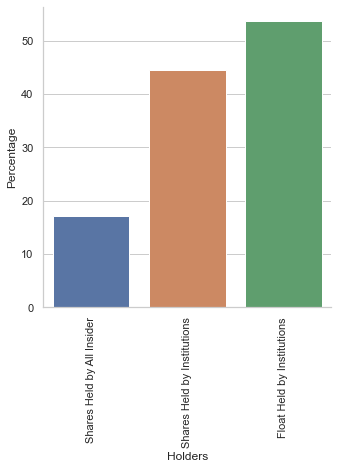

In [21]:
holders = stock.major_holders
holders = holders.rename(columns={0:'Percentage', 1:'Holders'})
holders = holders[holders['Holders'] != 'Number of Institutions Holding Shares']
holders['Holders'] = holders['Holders'].str.replace('% of ', '')
holders['Percentage'] = holders['Percentage'].str.replace('%', '').astype(float)

#Plotting
sns.set_theme(style='whitegrid')
sns.set_context = 'poster'
sns.catplot(x='Holders', y='Percentage', data=holders, kind='bar')
plt.xticks(rotation=90)
plt.show()

Finally, let´s see how many shares and stock value does each Institution has

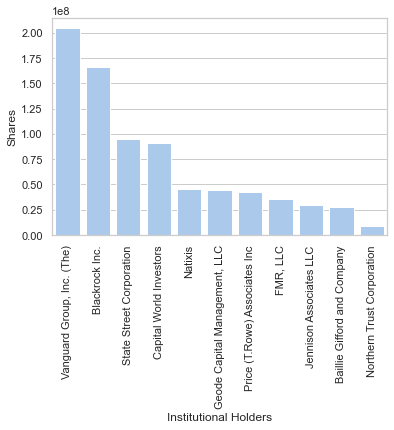

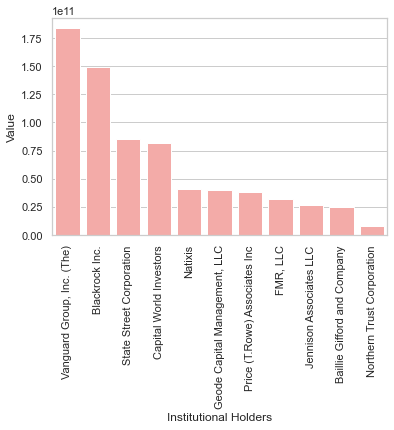

In [28]:
inst_holders = stock.institutional_holders
inst_holders = inst_holders[['Holder', 'Shares', 'Value']]
inst_holders = inst_holders.rename(columns={'Holder':'Institutional Holders'})

#Plotting
sns.set_theme(style='whitegrid')
sns.set_context = 'poster'
sns.set_color_codes('pastel')
sns.barplot(x='Institutional Holders', y='Shares', data=inst_holders, color = 'b')
plt.xticks(rotation=90)
plt.show()
sns.barplot(x='Institutional Holders', y='Value', data=inst_holders, color = 'r')
plt.xticks(rotation=90)
plt.show()